# Introduction

## Features

- data analysis / manipulation tool
- Tabular data with heterogeneously-typed columns
- SQL, CSV, Excel, txt interface
- Ordered and unordered (not necessarily fixed-frequency) time series data.


In [3]:
animals

,kind,height,weight
0,cat,9.1,7.9
1,dog,6.0,7.5
2,cat,9.5,9.9
3,dog,34.0,198.0


# Data manipulation

## General principles

- value-mutable
- size-immutable

## Series

- 1D data structrue

In [79]:
import numpy as np
import pandas as pd

In [90]:
s = pd.Series(range(1,7), index=pd.date_range('20130102', periods=6))

In [118]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    0
1    5
2    6
3    2
4    6
5    3
6    0
7    0
8    0
9    2
dtype: int32

### Struct

In [195]:
s.shape, s.size, s.dtype

((5,), 5, dtype('float64'))

In [208]:
s.index, s.axes, s.name

(Index(['a', 'b', 'c', 'd', 'e'], dtype='object'),
 [Index(['a', 'b', 'c', 'd', 'e'], dtype='object')],
 None)

In [190]:
s.array

<PandasArray>
[0.38223225545971584, -0.5105004555590296,  0.8755274623549244,
  0.5690450119600188,  -0.259352485574729]
Length: 5, dtype: float64

In [200]:
s.to_numpy()

array([-1.68831484, -1.48210805,  1.26248661,  1.09388663, -1.2765448 ])

### Indexing

In [278]:
s =  pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s

a    2.763770
b   -1.561094
c    0.334144
d   -1.943135
e    1.492388
dtype: float64

In [206]:
s['a'], s[['a','d','d']]

(-1.6883148360334448, a   -1.688315
 d    1.093887
 d    1.093887
 dtype: float64)

In [207]:
s[0], s[:4], s[:-1]

(-1.6883148360334448, a   -1.688315
 b   -1.482108
 c    1.262487
 d    1.093887
 dtype: float64, a   -1.688315
 b   -1.482108
 c    1.262487
 d    1.093887
 dtype: float64)

In [281]:
s[0]

2.7637697479926735

### Operation

In [279]:
s.explode()

a    2.763770
b   -1.561094
c    0.334144
d   -1.943135
e    1.492388
dtype: float64

In [285]:
s.replace(s['d'], 0)

a    2.763770
b   -1.561094
c    0.334144
d    0.000000
e    1.492388
dtype: float64

In [203]:
s.value_counts()

-1.276545    1
-1.688315    1
 1.093887    1
-1.482108    1
 1.262487    1
dtype: int64

## DataFrame

- 2D data structure

In [5]:
import numpy as np
import pandas as pd

### Struct and Ops

In [186]:
df.shape, df.size, df.dtypes

((6, 5), 30, A         float64
 B         float64
 C         float64
 D         float64
 Append     object
 dtype: object)

In [176]:
df.index, df.columns, df.axes

(DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
                '2013-01-05', '2013-01-06'],
               dtype='datetime64[ns]', freq='D'),
 Index(['A', 'B', 'C', 'D', 'Append'], dtype='object'),
 [DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
                 '2013-01-05', '2013-01-06'],
                dtype='datetime64[ns]', freq='D'),
  Index(['A', 'B', 'C', 'D', 'Append'], dtype='object')])

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 5 columns):
A         6 non-null float64
B         6 non-null float64
C         6 non-null float64
D         6 non-null float64
Append    6 non-null object
dtypes: float64(4), object(1)
memory usage: 448.0+ bytes


In [167]:
df

,A,B,C,D,Append
2013-01-01,0.000000,1.855360,3.001522,-1.607199,Mark
2013-01-02,-1.155055,0.000000,1.638626,-0.262791,N
2013-01-03,-0.766153,-0.499499,0.000000,-0.424870,M
2013-01-04,-1.925768,-0.656789,0.035512,0.000000,T
2013-01-05,-0.035881,1.788810,0.515268,0.472168,0
2013-01-06,0.397780,0.277218,0.607874,-0.879547,5


In [ ]:
df.head(2), df.tail(1)
df.copy()
df.sub(), df.add(), df.mul(), df.div()
fill_value=0
df.eq(), df.ne(), df.lt(), df.gt(), df.le(), df.ge()
df.empty, df.any(), df.all(), df.bool()
(df + df).equals(df * 2)

In [215]:
df.iloc[:, 0:4].sub(df['A'], axis=0)

,A,B,C,D
2013-01-01,0.0,1.855360,3.001522,-1.607199
2013-01-02,0.0,1.155055,2.793681,0.892264
2013-01-03,0.0,0.266654,0.766153,0.341283
2013-01-04,0.0,1.268979,1.961280,1.925768
2013-01-05,0.0,1.824691,0.551149,0.508049
2013-01-06,0.0,-0.120562,0.210093,-1.277327


### Indexing

In [73]:
dates = pd.date_range('20130101', periods=6)
cols = list('ABCD')
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=cols)
df['Append'] = ['Mark', 'N', 'M', 'T', 'V', 5]

In [74]:
df

,A,B,C,D,Append
2013-01-01,-0.831553,1.855360,3.001522,-1.607199,Mark
2013-01-02,-1.155055,0.138805,1.638626,-0.262791,N
2013-01-03,-0.766153,-0.499499,-0.044855,-0.424870,M
2013-01-04,-1.925768,-0.656789,0.035512,0.434787,T
2013-01-05,-0.035881,1.788810,0.515268,0.472168,V
2013-01-06,0.397780,0.277218,0.607874,-0.879547,5


In [48]:
df['A']

2013-01-01   -1.513051
2013-01-02   -0.277493
2013-01-03   -1.677167
2013-01-04   -0.797266
2013-01-05    1.229662
2013-01-06    0.355253
Freq: D, Name: A, dtype: float64

In [53]:
df.loc['2013-01-02'], df.loc[dates[1]]

(A   -0.277493
 B    1.382277
 C   -0.774748
 D   -0.531652
 Name: 2013-01-02 00:00:00, dtype: float64, A   -0.277493
 B    1.382277
 C   -0.774748
 D   -0.531652
 Name: 2013-01-02 00:00:00, dtype: float64)

In [49]:
df[1:3]

,A,B,C,D
2013-01-02,-0.277493,1.382277,-0.774748,-0.531652
2013-01-03,-1.677167,-0.942699,-0.722414,-0.370175


In [50]:
df['2013-01-02':'2013-01-05']

,A,B,C,D
2013-01-02,-0.277493,1.382277,-0.774748,-0.531652
2013-01-03,-1.677167,-0.942699,-0.722414,-0.370175
2013-01-04,-0.797266,0.394869,-0.653769,-0.614351
2013-01-05,1.229662,-0.566278,1.832499,-2.025417


In [54]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,-1.513051,-0.403028
2013-01-02,-0.277493,1.382277
2013-01-03,-1.677167,-0.942699
2013-01-04,-0.797266,0.394869
2013-01-05,1.229662,-0.566278
2013-01-06,0.355253,-1.081579


In [56]:
df.loc['2013-01-02':'2013-01-05', ['A', 'B']]

,A,B
2013-01-02,-0.277493,1.382277
2013-01-03,-1.677167,-0.942699
2013-01-04,-0.797266,0.394869
2013-01-05,1.229662,-0.566278


In [57]:
df.loc['2013-01-02', 'A']

-0.2774926833186846

In [58]:
df.iloc[0]

A   -1.513051
B   -0.403028
C   -0.590750
D    0.313733
Name: 2013-01-01 00:00:00, dtype: float64

In [61]:
df.iloc[0:4]

,A,B,C,D
2013-01-01,-1.513051,-0.403028,-0.590750,0.313733
2013-01-02,-0.277493,1.382277,-0.774748,-0.531652
2013-01-03,-1.677167,-0.942699,-0.722414,-0.370175
2013-01-04,-0.797266,0.394869,-0.653769,-0.614351


In [62]:
df.iloc[:, 0]

2013-01-01   -1.513051
2013-01-02   -0.277493
2013-01-03   -1.677167
2013-01-04   -0.797266
2013-01-05    1.229662
2013-01-06    0.355253
Freq: D, Name: A, dtype: float64

In [63]:
df.iloc[:, 0:2]

,A,B
2013-01-01,-1.513051,-0.403028
2013-01-02,-0.277493,1.382277
2013-01-03,-1.677167,-0.942699
2013-01-04,-0.797266,0.394869
2013-01-05,1.229662,-0.566278
2013-01-06,0.355253,-1.081579


In [64]:
df.iloc[1:2, 1:2]

,B
2013-01-02,1.382277


In [67]:
df.iloc[1, 1]

1.3822771295020726

In [66]:
df.iloc[[0, 3, 5], [0, 2, 3]]

,A,C,D
2013-01-01,-1.513051,-0.590750,0.313733
2013-01-04,-0.797266,-0.653769,-0.614351
2013-01-06,0.355253,1.582111,-0.943905


In [11]:
animals = pd.DataFrame({'kind': ['cat', 'dog', 'cat', 'dog'],
'height': [9.1, 6.0, 9.5, 34.0],
'weight': [7.9, 7.5, 9.9, 198.0]})

In [12]:
animals

,kind,height,weight
0,cat,9.1,7.9
1,dog,6.0,7.5
2,cat,9.5,9.9
3,dog,34.0,198.0


### Filtering

In [68]:
df[df<0]

,A,B,C,D
2013-01-01,-1.513051,-0.403028,-0.590750,NaN
2013-01-02,-0.277493,NaN,-0.774748,-0.531652
2013-01-03,-1.677167,-0.942699,-0.722414,-0.370175
2013-01-04,-0.797266,NaN,-0.653769,-0.614351
2013-01-05,NaN,-0.566278,NaN,-2.025417
2013-01-06,NaN,-1.081579,NaN,-0.943905


In [69]:
df[df.A > 0]

,A,B,C,D
2013-01-05,1.229662,-0.566278,1.832499,-2.025417
2013-01-06,0.355253,-1.081579,1.582111,-0.943905


In [219]:
df.query('A < 0 and C > 0')

,A,B,C,D,Append
2013-01-02,-1.155055,0.000000,1.638626,-0.262791,N
2013-01-04,-1.925768,-0.656789,0.035512,0.000000,T
2013-01-05,-0.035881,1.788810,0.515268,0.472168,0


In [75]:
df[df['Append'].isin(['M',5, 'Mark'])]

,A,B,C,D,Append
2013-01-01,-0.831553,1.855360,3.001522,-1.607199,Mark
2013-01-03,-0.766153,-0.499499,-0.044855,-0.424870,M
2013-01-06,0.397780,0.277218,0.607874,-0.879547,5


In [101]:
df2.iloc[-1,-1] = 0
df2.dropna(how='any')

,A,B,C,D,Append,E
2013-01-04,-1.925768,-0.656789,0.035512,0.0,T,0.0


In [107]:
pd.isna(df2)

,A,B,C,D,Append,E
2013-01-01,False,False,False,False,False,True
2013-01-02,False,False,False,False,False,True
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


### Rearranging

In [39]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-1.513051,-0.277493,-1.677167,-0.797266,1.229662,0.355253
B,-0.403028,1.382277,-0.942699,0.394869,-0.566278,-1.081579
C,-0.590750,-0.774748,-0.722414,-0.653769,1.832499,1.582111
D,0.313733,-0.531652,-0.370175,-0.614351,-2.025417,-0.943905


In [127]:
df.stack()

(2013-01-01  A                 0
             B           1.85536
             C           3.00152
             D           -1.6072
             Append         Mark
 2013-01-02  A          -1.15506
             B                 0
             C           1.63863
             D         -0.262791
             Append            N
 2013-01-03  A         -0.766153
             B         -0.499499
             C                 0
             D          -0.42487
             Append            M
 2013-01-04  A          -1.92577
             B         -0.656789
             C         0.0355116
             D                 0
             Append            T
 2013-01-05  A        -0.0358809
             B           1.78881
             C          0.515268
             D          0.472168
             Append            0
 2013-01-06  A           0.39778
             B          0.277218
             C          0.607874
             D         -0.879547
             Append            5
 dtype: ob

In [ ]:
df.unstack()

In [274]:
df.melt()

,variable,value
0,A,0
1,A,-1.15506
2,A,-0.766153
3,A,-1.92577
4,A,-0.0358809
5,A,0.39778
6,B,1.85536
7,B,0
8,B,-0.499499
9,B,-0.656789


In [ ]:
df.cut()

In [275]:
df.pivot()

KeyError: 'None of [None] are in the columns'

In [128]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

,C,0.000000,0.035512,0.515268,0.607874,1.638626,3.001522
A,B,,,,,,
-1.925768,-0.656789,NaN,0.0,NaN,NaN,NaN,NaN
-1.155055,0.000000,NaN,NaN,NaN,NaN,-0.262791,NaN
-0.766153,-0.499499,-0.42487,NaN,NaN,NaN,NaN,NaN
-0.035881,1.788810,NaN,NaN,0.472168,NaN,NaN,NaN
0.000000,1.855360,NaN,NaN,NaN,NaN,NaN,-1.607199
0.397780,0.277218,NaN,NaN,NaN,-0.879547,NaN,NaN


In [ ]:
df1.combine_first(df2)

In [ ]:
pd.concat(pieces)

In [ ]:
pd.merge(left, right, on='key')

In [ ]:
left.join(right, on=['key1', 'key2'], how='inner')

In [44]:
df.sort_index(axis=1, ascending=False).sort_index(axis=0, ascending=False)

,D,C,B,A
2013-01-06,-0.943905,1.582111,-1.081579,0.355253
2013-01-05,-2.025417,1.832499,-0.566278,1.229662
2013-01-04,-0.614351,-0.653769,0.394869,-0.797266
2013-01-03,-0.370175,-0.722414,-0.942699,-1.677167
2013-01-02,-0.531652,-0.774748,1.382277,-0.277493
2013-01-01,0.313733,-0.590750,-0.403028,-1.513051


In [46]:
df.sort_values(by='C', ascending=False)

,A,B,C,D
2013-01-05,1.229662,-0.566278,1.832499,-2.025417
2013-01-06,0.355253,-1.081579,1.582111,-0.943905
2013-01-01,-1.513051,-0.403028,-0.590750,0.313733
2013-01-04,-0.797266,0.394869,-0.653769,-0.614351
2013-01-03,-1.677167,-0.942699,-0.722414,-0.370175
2013-01-02,-0.277493,1.382277,-0.774748,-0.531652


In [121]:
stmp = df.iloc[3]
df.append(stmp, ignore_index=True)

,A,B,C,D,Append
0,0.000000,1.855360,3.001522,-1.607199,Mark
1,-1.155055,0.000000,1.638626,-0.262791,N
2,-0.766153,-0.499499,0.000000,-0.424870,M
3,-1.925768,-0.656789,0.035512,0.000000,T
4,-0.035881,1.788810,0.515268,0.472168,0
5,0.397780,0.277218,0.607874,-0.879547,5
6,-1.925768,-0.656789,0.035512,0.000000,T


In [210]:
df.assign(AC=lambda x: (x['A'] + x['C']))

,A,B,C,D,Append,AC
2013-01-01,0.000000,1.855360,3.001522,-1.607199,Mark,3.001522
2013-01-02,-1.155055,0.000000,1.638626,-0.262791,N,0.483570
2013-01-03,-0.766153,-0.499499,0.000000,-0.424870,M,-0.766153
2013-01-04,-1.925768,-0.656789,0.035512,0.000000,T,-1.890257
2013-01-05,-0.035881,1.788810,0.515268,0.472168,0,0.479387
2013-01-06,0.397780,0.277218,0.607874,-0.879547,5,1.005654


In [ ]:
df.align(df2, join='inner', axis=0)
join='outer'
join='left'
join='right'

In [ ]:
df.drop(['a', 'd'], axis=0)
df2.dropna(how='any')

In [ ]:
df2 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df2

In [ ]:
df.transform(np.abs)
df.transform('abs')
df.transform([np.abs, lambda x: x + 1])
tsdf.transform({'A': np.abs, 'B': lambda x: x + 1})
df.transform({'A': np.abs, 'B': [lambda x: x + 1, 'sqrt']})

In [ ]:
df.applymap(f)

In [213]:
df.query('A < 0 and C > 0')

,A,B,C,D,Append
2013-01-02,-1.155055,0.000000,1.638626,-0.262791,N
2013-01-04,-1.925768,-0.656789,0.035512,0.000000,T
2013-01-05,-0.035881,1.788810,0.515268,0.472168,0


In [ ]:
df.groupby('A').sum()
df.groupby(['A', 'B']).sum()

In [ ]:
df.agg(np.sum)
df.agg('sum')
df.agg(['sum', 'mean'])
tsdf.agg({'A': 'mean', 'B': 'sum'})

In [ ]:
df.apply(np.mean, axis=1)
df.apply('mean', axis=1)

In [ ]:
(df.pipe(h).pipe(g, arg1=1).pipe(f, arg2=2, arg3=3))
f(g(h(df), arg1=1), arg2=2, arg3=3)

### Setting

#### value setting in-place

In [95]:
df.at[dates[0], 'A'] = 0
df.iloc[0,0]

0.0

In [96]:
for i in range(5):
    df.iloc[i,i] = 0
df

,A,B,C,D,Append
2013-01-01,0.000000,1.855360,3.001522,-1.607199,Mark
2013-01-02,-1.155055,0.000000,1.638626,-0.262791,N
2013-01-03,-0.766153,-0.499499,0.000000,-0.424870,M
2013-01-04,-1.925768,-0.656789,0.035512,0.000000,T
2013-01-05,-0.035881,1.788810,0.515268,0.472168,0
2013-01-06,0.397780,0.277218,0.607874,-0.879547,5


#### value setting in-copy

In [106]:
df2.fillna('string')

,A,B,C,D,Append,E
2013-01-01,0.000000,1.855360,3.001522,-1.607199,Mark,string
2013-01-02,-1.155055,0.000000,1.638626,-0.262791,N,string
2013-01-03,-0.766153,-0.499499,0.000000,-0.424870,M,string
2013-01-04,-1.925768,-0.656789,0.035512,0.000000,T,string


### Analytic

In [ ]:
df.describe()

In [183]:
df.mean(), df.mean(1)
df.sum(), df.sum(1)
df.quantile(), df.quantile(axis=1)

(A   -0.401017
 B    0.138609
 C    0.561571
 D   -0.343831
 Name: 0.5, dtype: float64, 2013-01-01    0.927680
 2013-01-02   -0.131396
 2013-01-03   -0.462185
 2013-01-04   -0.328395
 2013-01-05    0.493718
 2013-01-06    0.337499
 Freq: D, Name: 0.5, dtype: float64)

count Number of non-NA observations
sum Sum of values
mean Mean of values
mad Mean absolute deviation
median Arithmetic median of values
min Minimum
max Maximum
mode Mode
abs Absolute Value
prod Product of values
std Bessel-corrected sample standard deviation
var Unbiased variance
sem Standard error of the mean
skew Sample skewness (3rd moment)
kurt Sample kurtosis (4th moment)
quantile Sample quantile (value at %)
cumsum Cumulative sum
cumprod Cumulative product
cummax Cumulative maximum
cummin Cumulative minimum

In [114]:
df

,A,B,C,D,Append
2013-01-01,0.000000,1.855360,3.001522,-1.607199,Mark
2013-01-02,-1.155055,0.000000,1.638626,-0.262791,N
2013-01-03,-0.766153,-0.499499,0.000000,-0.424870,M
2013-01-04,-1.925768,-0.656789,0.035512,0.000000,T
2013-01-05,-0.035881,1.788810,0.515268,0.472168,0
2013-01-06,0.397780,0.277218,0.607874,-0.879547,5


In [116]:
df.iloc[:, 0:4].apply(lambda x: x.max() - x.min())

A    2.323549
B    2.512149
C    3.001522
D    2.079367
dtype: float64

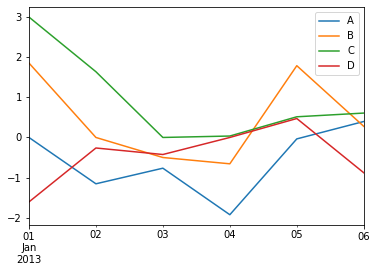

In [143]:
df.iloc[:, 0:4].plot()

## Ingestion APIs

### MySQl

In [221]:
import pandas as pd
from sqlalchemy import create_engine

In [223]:
alchemyconfig = {
    'user': 'root',
    'passw': 'root1MYSQL',
    'host': '127.0.0.1',
    'port': 3306,
    'database': 'pandasdb'
}

alchemyURL= 'mysql+mysqlconnector://{user}:{passw}@{host}/{database}'.format(**alchemyconfig)

mydb = create_engine(alchemyURL, echo=False)

In [224]:
dbdf = pd.read_sql_query("SELECT * FROM past_due", mydb)

In [226]:
dbdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143712 entries, 0 to 143711
Data columns (total 3 columns):
id             143712 non-null object
report_date    143712 non-null object
past_due       143712 non-null object
dtypes: object(3)
memory usage: 3.3+ MB


### csv

In [157]:
df4 = pd.read_csv('Data/foo.csv', index_col=0)

In [158]:
df4

,A,B,C,D,Append
2013-01-01,0.000000,1.855360,3.001522,-1.607199,Mark
2013-01-02,-1.155055,0.000000,1.638626,-0.262791,N
2013-01-03,-0.766153,-0.499499,0.000000,-0.424870,M
2013-01-04,-1.925768,-0.656789,0.035512,0.000000,T
2013-01-05,-0.035881,1.788810,0.515268,0.472168,0
2013-01-06,0.397780,0.277218,0.607874,-0.879547,5


### json

In [164]:
df5 = pd.read_json('Data/foo.json')
df5

,A,B,C,D,Append
2013-01-01,0.000000,1.855360,3.001522,-1.607199,Mark
2013-01-02,-1.155055,0.000000,1.638626,-0.262791,N
2013-01-03,-0.766153,-0.499499,0.000000,-0.424870,M
2013-01-04,-1.925768,-0.656789,0.035512,0.000000,T
2013-01-05,-0.035881,1.788810,0.515268,0.472168,0
2013-01-06,0.397780,0.277218,0.607874,-0.879547,5


In [9]:
import pandas.io.json as json

In [160]:
jsondata = ata = [{
 'CreatedBy': {'Name': 'User001'},
 'Lookup': {'TextField': 'Some text',
                 'UserField': {'Id': 'ID001', 'Name': 'Name001'}},
 'Image': {'a': 'b'}
 }]
                 

In [11]:
json.json_normalize(jsondata, max_level=1)

,CreatedBy.Name,Lookup.TextField,Lookup.UserField,Image.a
0,User001,Some text,"{'Id': 'ID001', 'Name': 'Name001'}",b


In [12]:
json.json_normalize(jsondata)

,CreatedBy.Name,Lookup.TextField,Lookup.UserField.Id,Lookup.UserField.Name,Image.a
0,User001,Some text,ID001,Name001,b


### HTML

In [261]:
from bs4 import BeautifulSoup

In [263]:
dfhtml = pd.read_html('Data/foo.html')
dfhtml

[   Unnamed: 0 kind  height  weight
 0           0  cat     9.1     7.9
 1           1  dog     6.0     7.5
 2           2  cat     9.5     9.9
 3           3  dog    34.0   198.0,
    Unnamed: 0         A         B         C         D Append
 0  2013-01-01  0.000000  1.855360  3.001522 -1.607199   Mark
 1  2013-01-02 -1.155055  0.000000  1.638626 -0.262791      N
 2  2013-01-03 -0.766153 -0.499499  0.000000 -0.424870      M
 3  2013-01-04 -1.925768 -0.656789  0.035512  0.000000      T
 4  2013-01-05 -0.035881  1.788810  0.515268  0.472168      0
 5  2013-01-06  0.397780  0.277218  0.607874 -0.879547      5,
    Unnamed: 0    A         B         C         D
 0  2013-01-01  0.0  1.855360  3.001522 -1.607199
 1  2013-01-02  0.0  1.155055  2.793681  0.892264
 2  2013-01-03  0.0  0.266654  0.766153  0.341283
 3  2013-01-04  0.0  1.268979  1.961280  1.925768
 4  2013-01-05  0.0  1.824691  0.551149  0.508049
 5  2013-01-06  0.0 -0.120562  0.210093 -1.277327,
    Unnamed: 0         A         

### excel

In [155]:
df3 = pd.read_excel('Data/foo.xlsx', 'Sheet1', index_col=0, na_values=['NA'])
df3

,A,B,C,D,Append
2013-01-01,0.000000,1.855360,3.001522,-1.607199,Mark
2013-01-02,-1.155055,0.000000,1.638626,-0.262791,N
2013-01-03,-0.766153,-0.499499,0.000000,-0.424870,M
2013-01-04,-1.925768,-0.656789,0.035512,0.000000,T
2013-01-05,-0.035881,1.788810,0.515268,0.472168,0
2013-01-06,0.397780,0.277218,0.607874,-0.879547,5


### pandas_datareader

In [9]:
import pandas_datareader as pdr

In [10]:
print(pdr.get_quote_yahoo('AAPL')['price'])

AAPL    205.7
Name: price, dtype: float64


### HDFS

In [ ]:
pd.read_hdf('foo.h5', 'df')

## Egression APIs

In [33]:
df.to_numpy()

array([[-1.51305087, -0.40302837, -0.59074983,  0.31373345],
       [-0.27749268,  1.38227713, -0.77474846, -0.53165227],
       [-1.67716694, -0.94269858, -0.7224141 , -0.37017509],
       [-0.79726605,  0.39486903, -0.65376924, -0.61435065],
       [ 1.22966166, -0.56627776,  1.83249856, -2.02541706],
       [ 0.35525285, -1.08157886,  1.58211143, -0.94390518]])

In [162]:
df.to_csv('Data/foo.csv')

In [163]:
df.to_json('Data/foo.json', orient='columns')

In [150]:
df.to_excel('Data/foo.xlsx', sheet_name='Sheet1')

In [151]:
df.to_hdf('Data/foo.h5', 'df')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:2530: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->['Append']]

  pytables.to_hdf(path_or_buf, key, self, **kwargs)


### MySQL

In [234]:
import pandas as pd
from sqlalchemy import create_engine
alchemyconfig = {
    'user': 'root',
    'passw': 'root1MYSQL',
    'host': '127.0.0.1',
    'port': 3306,
    'database': 'pandasdb'
}

alchemyURL= 'mysql+mysqlconnector://{user}:{passw}@{host}/{database}'.format(**alchemyconfig)

mydb = create_engine(alchemyURL, echo=False)

In [235]:
df.to_sql(name='dftable01', con=mydb, if_exists = 'replace', index=True)

In [236]:
pd.read_sql_query("desc dftable01", mydb)

,Field,Type,Null,Key,Default,Extra
0,index,datetime,YES,MUL,None,
1,A,double,YES,,None,
2,B,double,YES,,None,
3,C,double,YES,,None,
4,D,double,YES,,None,
5,Append,text,YES,,None,


In [249]:
dftable01 = pd.read_sql_query("select * from dftable01", mydb, index_col='index')
dftable01

,A,B,C,D,Append
index,,,,,
2013-01-01,0.000000,1.855360,3.001522,-1.607199,Mark
2013-01-02,-1.155055,0.000000,1.638626,-0.262791,N
2013-01-03,-0.766153,-0.499499,0.000000,-0.424870,M
2013-01-04,-1.925768,-0.656789,0.035512,0.000000,T
2013-01-05,-0.035881,1.788810,0.515268,0.472168,0
2013-01-06,0.397780,0.277218,0.607874,-0.879547,5


In [257]:
all(dftable01.index == df.index)

True

## Pands Data and Types

### Types

bool  
int8; uint8; int32; int64  
float32; float64  
datetime64; timedelta64
category
object  

### Vectorize Objects

In [21]:
pd.to_datetime(1490195805, unit='s')
pd.to_datetime('13000101', format='%Y%m%d', errors='ignore')
pd.to_datetime([1, 2, 3], unit='D', origin=pd.Timestamp('1960-01-01'))

DatetimeIndex(['1960-01-02', '1960-01-03', '1960-01-04'], dtype='datetime64[ns]', freq=None)

In [18]:
pd.Timestamp('20130102')
pd.Timestamp.now()

Timestamp('2019-09-04 14:26:29.243490')

In [ ]:
s = pd.Series(pd.date_range('20130101 09:10:12', periods=4))
s.dt.day

In [188]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Categorical

In [131]:
c = df["Append"].astype("category")

In [134]:
ct = pd.Categorical(["test", "train", "test", "train"])

In [135]:
ct

[test, train, test, train]
Categories (2, object): [test, train]

In [138]:
c.cat.categories

Index([0, 5, 'M', 'Mark', 'N', 'T'], dtype='object')

In [286]:
c.cat.ordered

False

# END